In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### We can see that there maybe outliers in Fare column, since difference between 75% and max value is huge.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### There are a total of 891 passengers in our training set.
### The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.
### The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.
### The Embarked feature is missing 0.22% of its values, which should be relatively harmless.

# Univariate Analysis

Text(0.5, 1.0, 'Survived')

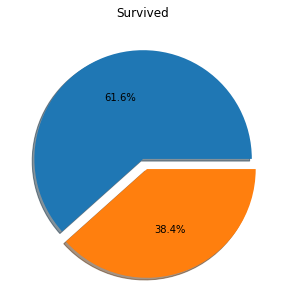

In [8]:
plt.figure(figsize=(5,5))
plt.pie(data['Survived'].value_counts(),explode=[0,0.1],shadow=True, autopct='%1.1f%%')
plt.title("Survived")

S    644
C    168
Q     77
Name: Embarked, dtype: int64


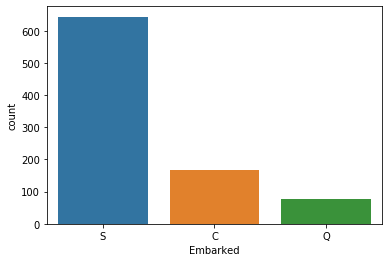

In [130]:
print(data["Embarked"].value_counts())

sns.countplot('Embarked', data = data)

### Majority of people embarked in Southampton (S)

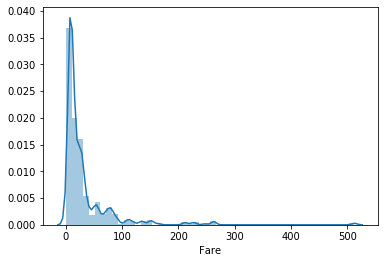

In [131]:
sns.distplot(data['Fare'])

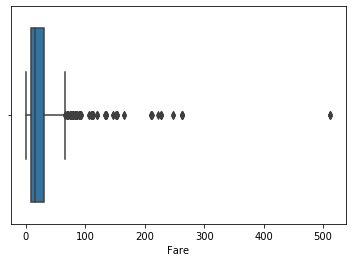

In [132]:
sns.boxplot('Fare', data = data)

# Bivariate and Multi variate

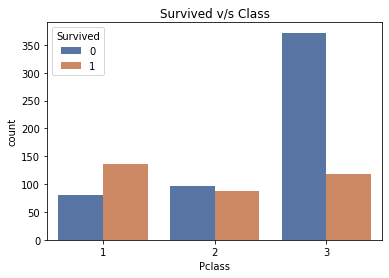

In [133]:
plt.title("Survived v/s Class")
sns.countplot('Pclass', data = data, hue = 'Survived', palette = "deep")

### Many people of class 3 died, whereas most people from class 1 survived since they were given very high priority during rescue operation

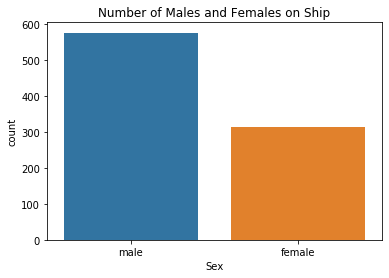

In [134]:
plt.title("Number of Males and Females on Ship")
sns.countplot('Sex', data = data)

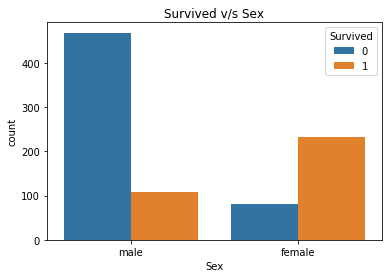

In [135]:
plt.title("Survived v/s Sex")
sns.countplot('Sex', data = data, hue = 'Survived')

### The no. of men on ship is a lot more than the number of women, still number of women saved is almost twice the number of males saved,  almost 75% of men died

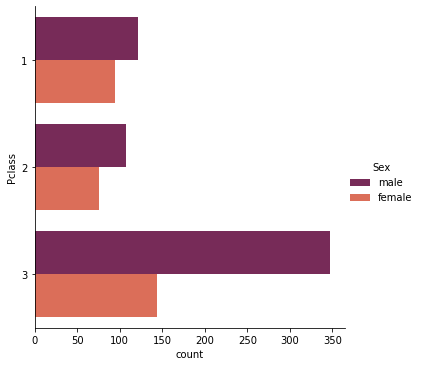

In [136]:
sns.catplot(y = 'Pclass', data = data, kind = 'count', hue = 'Sex', palette = "rocket")

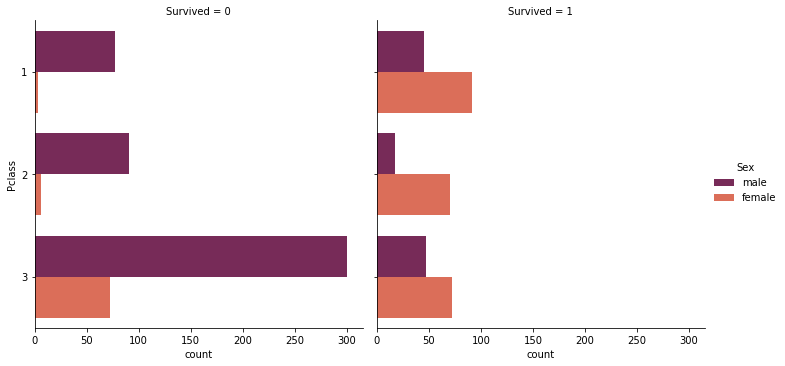

In [137]:
sns.catplot(y = 'Pclass', data = data, kind = 'count', hue = 'Sex', col = 'Survived', palette = "rocket")

### Women from class 1 have survived the most and from class 3 have died the most which shows that privilege were given to class 1 women the most. 
### Men of both class 1 and 3 have survived almost in same ratio. Men from class 3 died the most since the count of class 3 men was high as compared to class 2 & 3 men. Over here men are not given that much privilege according to their respective classes

In [138]:
print(data['SibSp'].value_counts())

print("Percentage of SibSp = 0 who survived:", data["Survived"][data["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", data["Survived"][data["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", data["Survived"][data["SibSp"] == 2].value_counts(normalize = True)[1]*100)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


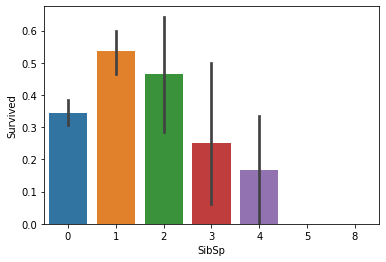

In [139]:
#SibSp Feature

sns.barplot(x = "SibSp", y = "Survived", data = data)

### People with more spouses or siblings aboard were less likely to survive. However, people with no spouses or siblings aboard were also less likely to survive than those with one or two

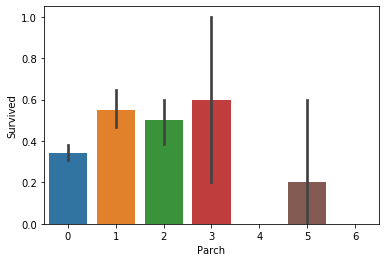

In [140]:
#Parch Feature

sns.barplot(x = "Parch", y = "Survived", data = data)

### People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

In [141]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Highest Fare was: 512.3292
### Lowest Fare was: 0.0
### Average Fare was: 32.204208

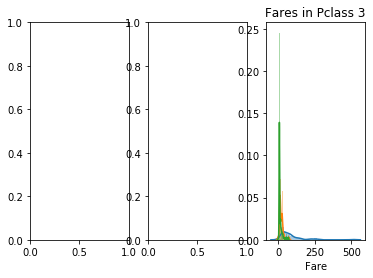

In [10]:
plt.subplots(1,3)
plt.title("Fares in Pclass 1")
sns.distplot(data[data['Pclass']==1].Fare)

#plt.subplots(1,3)
plt.title("Fares in Pclass 2")
sns.distplot(data[data['Pclass']==2].Fare)

#plt.subplots(1,3,3)
plt.title("Fares in Pclass 3")
sns.distplot(data[data['Pclass']==3].Fare)

### As Fare increases survival chances increases
There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

# Treating Missing values

### Majority of people embarked in Southampton (S) so we will fill missing vaues with S

In [11]:
data["Embarked"] = data["Embarked"].fillna("S") # Missing values treatment

In [12]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Oldest Passenger was of 80 yrs
### Average Age on the ship was 29 yrs

In [13]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [14]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [16]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [17]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [18]:
data.Age.isnull().any()

False

# Dropping Columns

In [19]:
data = data.drop(['Cabin'], axis = 1)
data = data.drop(['Name'], axis = 1)
data = data.drop(["Ticket"], axis = 1)
data = data.drop(['Initial'], axis = 1)
data = data.drop(['PassengerId'], axis = 1)

In [20]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,22.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [22]:
data["Sex"] = Label_Encoder.fit_transform(data["Sex"])
data["Embarked"] = Label_Encoder.fit_transform(data["Embarked"]) 

In [23]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,22.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


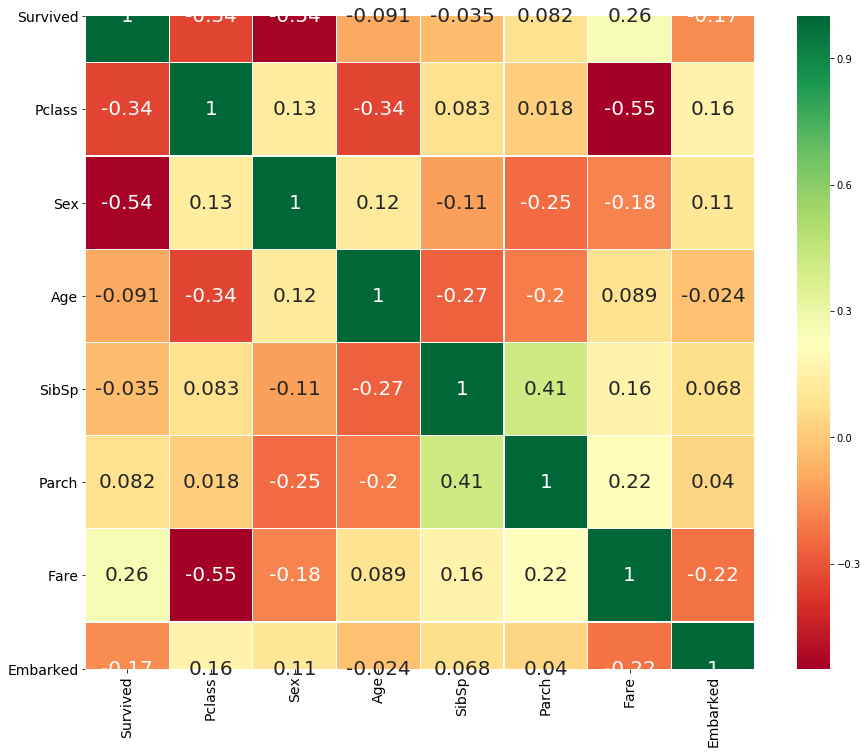

In [164]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(15,12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Fare is highly correlated followed by Parch, Sex is least correlated to Survived

# ML

In [24]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

# 1.Logistic Regression

In [169]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [170]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 7), (223, 7), (668,), (223,))

## Training the Algorithm

In [171]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg') # For multinomial problem newton-cg is a good option

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

## Making Predictions

In [172]:
y_pred = logreg.predict(X_test)

In [173]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1


In [188]:
proba = logreg.predict_proba(X_test)

In [189]:
proba[0:10]

array([[0.86582073, 0.13417927],
       [0.90872   , 0.09128   ],
       [0.92274701, 0.07725299],
       [0.07498161, 0.92501839],
       [0.30300728, 0.69699272],
       [0.55047238, 0.44952762],
       [0.09134669, 0.90865331],
       [0.06996571, 0.93003429],
       [0.43127444, 0.56872556],
       [0.34651769, 0.65348231]])

## Evaluating the Algorithm

In [176]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,  23],
       [ 23,  61]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

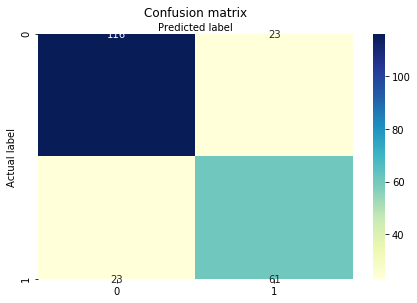

In [177]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [179]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       139
           1       0.73      0.73      0.73        84

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [178]:
# Confusion Matrix Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7937219730941704
Precision: 0.7261904761904762
Recall: 0.7261904761904762


Accuracy score is 79%, which is considered as good metric. Accuracy score is not a very good thing to perform measure.

In our prediction case, when Logistic Regression model predicted that these many passengers are not going to survive, that means 72% from these many passengers will surely die.

Recall: There are passengers who are not going to survive in the test set and your Logistic Regression model can identify it 72% of the time.

In [187]:
probas = logreg.predict_proba(X_test)[:,1]
probas

array([0.13417927, 0.09128   , 0.07725299, 0.92501839, 0.69699272,
       0.44952762, 0.90865331, 0.93003429, 0.56872556, 0.65348231,
       0.08569541, 0.74586473, 0.11049801, 0.91758092, 0.96515354,
       0.76223877, 0.13445035, 0.25912586, 0.08438754, 0.37347349,
       0.35208414, 0.95586578, 0.11049637, 0.44969343, 0.69438451,
       0.90594848, 0.09498154, 0.69379051, 0.84380161, 0.61700245,
       0.13327948, 0.65467126, 0.11118965, 0.45118627, 0.07595954,
       0.56589834, 0.06103846, 0.26020148, 0.28670034, 0.10267703,
       0.21164643, 0.17839757, 0.09205552, 0.04825164, 0.88565463,
       0.09131845, 0.09131845, 0.95071217, 0.17966316, 0.19911737,
       0.44936181, 0.65512566, 0.90205509, 0.15571342, 0.55495078,
       0.17747962, 0.18761589, 0.42991331, 0.07524452, 0.05671162,
       0.19827207, 0.5746365 , 0.83759715, 0.55822512, 0.62008261,
       0.11483323, 0.85018688, 0.25490634, 0.90978635, 0.95446178,
       0.80451474, 0.23191077, 0.53360119, 0.0913356 , 0.12688

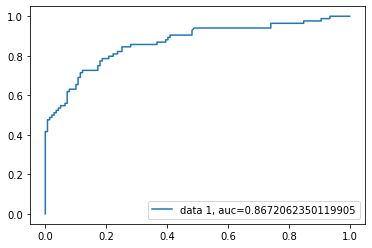

In [186]:
fpr, tpr, _ = metrics.roc_curve(y_test,  probas)
auc = metrics.roc_auc_score(y_test, probas)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.86. 

It means there is 86% chance that model will be able to distinguish between positive class and negative class.

AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

# 2.Decision Tree

In [43]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train_dt,X_test_dt,y_train_dt,y_test_dt=train_test_split(X,y,test_size=0.25,random_state=0)

In [44]:
X_train_dt.shape, X_test_dt.shape, y_train_dt.shape, y_test_dt.shape

((668, 7), (223, 7), (668,), (223,))

## Training the Algorithm

In [45]:
#Training the model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 50)

In [46]:
clf.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Making Predictions

In [47]:
y_pred_dt = clf.predict(X_test_dt)

In [48]:
df = pd.DataFrame({'Actual': y_test_dt, 'Predicted': y_pred_dt})
df.head()

,Actual,Predicted
495,0,0
648,0,0
278,0,1
31,1,1
255,1,1


## Evaluating the Algorithm

In [50]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train_dt, y_train_dt)
print("Test set accuracy - ", metrics.accuracy_score(y_test_dt, clf.predict(X_test_dt)))
print("Train set accuracy - ", metrics.accuracy_score(y_train_dt, clf.predict(X_train_dt)))

Test set accuracy -  0.7802690582959642
Train set accuracy -  0.9805389221556886


In [51]:
clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split=50)
clf.fit(X_train_dt, y_train_dt)
print("Test set accuracy - ", metrics.accuracy_score(y_test_dt, clf.predict(X_test_dt)))
print("Train set accuracy - ", metrics.accuracy_score(y_train_dt, clf.predict(X_train_dt)))

Test set accuracy -  0.8071748878923767
Train set accuracy -  0.8458083832335329


In [52]:
clf = DecisionTreeClassifier(criterion = 'gini')
clf.fit(X_train_dt, y_train_dt)
print("Test set accuracy - ", metrics.accuracy_score(y_test_dt, clf.predict(X_test_dt)))
print("Train set accuracy - ", metrics.accuracy_score(y_train_dt, clf.predict(X_train_dt)))

Test set accuracy -  0.7937219730941704
Train set accuracy -  0.9805389221556886


In [53]:
clf = DecisionTreeClassifier(criterion = 'gini', min_samples_split=50)
clf.fit(X_train_dt, y_train_dt)
print("Test set accuracy - ", metrics.accuracy_score(y_test_dt, clf.predict(X_test_dt)))
print("Train set accuracy - ", metrics.accuracy_score(y_train_dt, clf.predict(X_train_dt)))

Test set accuracy -  0.7937219730941704
Train set accuracy -  0.8383233532934131


### By comparing the test set accuracy, entropy with min sample split 50 gives better accuracy. So we are going to use other metrics on this(entropy with min sample split 50) criteria.

In [54]:
# import the metrics class
from sklearn import metrics
cnf_matrix_dt = metrics.confusion_matrix(y_test_dt, y_pred_dt)
cnf_matrix_dt

array([[115,  24],
       [ 19,  65]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

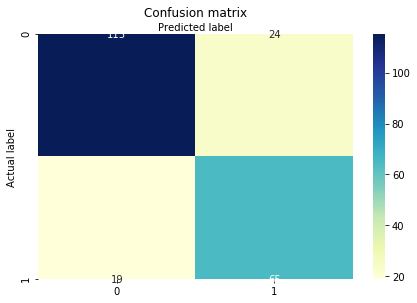

In [55]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dt), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
print(metrics.classification_report(y_test_dt, y_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       139
           1       0.73      0.77      0.75        84

    accuracy                           0.81       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [57]:
# Confusion Matrix Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test_dt, y_pred_dt))
print("Precision:",metrics.precision_score(y_test_dt, y_pred_dt))
print("Recall:",metrics.recall_score(y_test_dt, y_pred_dt))

Accuracy: 0.8071748878923767
Precision: 0.7303370786516854
Recall: 0.7738095238095238


Accuracy score is 80%, which is considered as good metric. Accuracy score is not a very good thing to perform measure.

In our prediction case, when Decision Tree model predicted that these many passengers are not going to survive, that means 73% from these many passengers will surely die.

Recall: There are passengers who are not going to survive in the test set and your Decision Tree model can identify it 77% of the time.

In [58]:
probas_dt = clf.predict_proba(X_test_dt)[:,1]
probas_dt

array([0.        , 0.04444444, 0.55882353, 1.        , 0.75675676,
       0.1875    , 0.9       , 0.9       , 0.38709677, 0.75675676,
       0.03703704, 0.88571429, 0.04444444, 1.        , 1.        ,
       0.55      , 0.03703704, 0.09090909, 0.15217391, 0.55882353,
       0.        , 0.9       , 0.04444444, 0.1875    , 0.55      ,
       1.        , 0.46153846, 0.55      , 1.        , 0.13636364,
       0.15217391, 0.88571429, 0.19047619, 0.1875    , 0.19047619,
       0.1875    , 0.        , 0.19047619, 0.        , 0.        ,
       0.09090909, 0.3125    , 0.        , 0.55882353, 1.        ,
       0.04444444, 0.04444444, 0.9       , 0.15217391, 0.09090909,
       0.1875    , 0.09090909, 1.        , 0.11428571, 0.1875    ,
       0.38709677, 0.66666667, 0.13636364, 0.55882353, 0.        ,
       0.3125    , 0.55      , 1.        , 0.1875    , 0.55      ,
       0.46153846, 0.88571429, 0.09090909, 0.        , 1.        ,
       0.88571429, 0.1875    , 0.38709677, 0.15217391, 0.03703

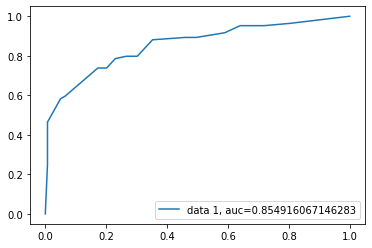

In [59]:
fpr, tpr, _ = metrics.roc_curve(y_test_dt,  probas_dt)
auc = metrics.roc_auc_score(y_test_dt, probas_dt)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.85.

It means there is 85% chance that model will be able to distinguish between positive class and negative class.

AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

# 3.Random Forest

In [26]:
#Split into train and test
from sklearn.model_selection import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
X_train_rf.shape, X_test_rf.shape, y_train_rf.shape, y_test_rf.shape

((623, 7), (268, 7), (623,), (268,))

## Training the Algorithm

In [29]:
from sklearn.ensemble import RandomForestClassifier
rlf = RandomForestClassifier()

In [30]:
rlf.fit(X_train_rf,y_train_rf)

C:\Jupyter Notebook\saln\Installed anaconda setup\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
len(rlf.estimators_)  # How many decision trees were made

10

## Making Predictions

In [32]:
y_pred_rf = rlf.predict(X_test_rf)

In [33]:
df = pd.DataFrame({'Actual': y_test_rf, 'Predicted': y_pred_rf})
df.head()

,Actual,Predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1


## Evaluating the Algorithm

In [35]:
# import the metrics class
from sklearn import metrics
cnf_matrix_rf = metrics.confusion_matrix(y_test_rf, y_pred_rf)
cnf_matrix_rf

array([[147,  21],
       [ 35,  65]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

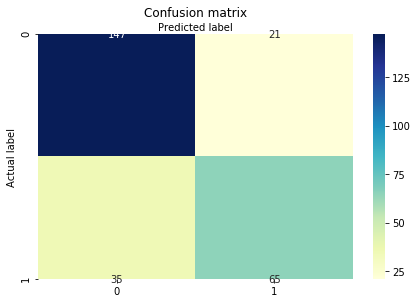

In [36]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
print(metrics.classification_report(y_test_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       168
           1       0.76      0.65      0.70       100

    accuracy                           0.79       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.79      0.79      0.79       268



In [40]:
# Confusion Matrix Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test_rf, y_pred_rf))
print("Precision:",metrics.precision_score(y_test_rf, y_pred_rf))
print("Recall:",metrics.recall_score(y_test_rf, y_pred_rf))

Accuracy: 0.7910447761194029
Precision: 0.7558139534883721
Recall: 0.65


Accuracy score is 79%, which is considered as good metric. Accuracy score is not a very good thing to perform measure.

In our prediction case, when Random Forest model predicted that these many passengers are not going to survive, that means 75% from these many passengers will surely die.

Recall: There are passengers who are not going to survive in the test set and our Random Forest model can identify it 65% of the time.

In [60]:
probas_rf = rlf.predict_proba(X_test_rf)[:,1]
probas_rf

array([0.2       , 0.14545455, 0.        , 1.        , 0.6       ,
       0.5       , 1.        , 0.7       , 0.6       , 0.64285714,
       0.2       , 0.6       , 0.06659091, 0.9       , 1.        ,
       0.5       , 0.        , 0.6       , 0.        , 0.36666667,
       0.15      , 1.        , 0.0125    , 0.4       , 0.7       ,
       1.        , 0.64      , 0.9       , 1.        , 0.        ,
       0.        , 0.7       , 0.2       , 0.        , 0.2       ,
       0.1       , 0.        , 0.1       , 0.        , 0.1       ,
       0.4       , 0.4       , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.8       , 0.        , 0.5       ,
       0.2       , 0.2       , 1.        , 0.        , 0.        ,
       0.1       , 0.        , 0.        , 0.1       , 0.        ,
       0.3       , 0.5       , 1.        , 0.3       , 0.5       ,
       0.22      , 1.        , 0.2       , 0.8       , 1.        ,
       0.9       , 0.2       , 0.6       , 0.        , 0.     

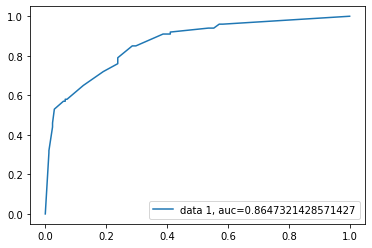

In [61]:
fpr, tpr, _ = metrics.roc_curve(y_test_rf,  probas_rf)
auc = metrics.roc_auc_score(y_test_rf, probas_rf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.86.

It means there is 86% chance that model will be able to distinguish between positive class and negative class.

AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

# 4.Naive Bayes

In [62]:
#Split into train and test
from sklearn.model_selection import train_test_split
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.3, random_state=0)

In [63]:
X_train_nb.shape, X_test_nb.shape, y_train_nb.shape, y_test_nb.shape

((623, 7), (268, 7), (623,), (268,))

## Training the Algorithm

In [64]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [76]:
# fit the training data
gnb.fit(X_train_nb, y_train_nb)

GaussianNB(priors=None, var_smoothing=1e-09)

## Making Predictions

In [77]:
# making predictions on the testing set
y_pred_nb = gnb.predict(X_test_nb)

In [78]:
df = pd.DataFrame({'Actual': y_test_nb, 'Predicted': y_pred_nb})
df.head()

,Actual,Predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1


## Evaluating the Algorithm

In [79]:
# import the metrics class
from sklearn import metrics
cnf_matrix_nb = metrics.confusion_matrix(y_test_nb, y_pred_nb)
cnf_matrix_nb

array([[135,  33],
       [ 24,  76]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

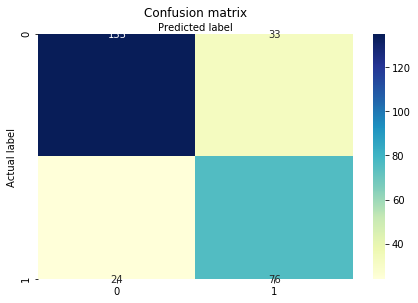

In [71]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nb), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [72]:
print(metrics.classification_report(y_test_nb, y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       168
           1       0.70      0.76      0.73       100

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [73]:
# Confusion Matrix Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test_nb, y_pred_nb))
print("Precision:",metrics.precision_score(y_test_nb, y_pred_nb))
print("Recall:",metrics.recall_score(y_test_nb, y_pred_nb))

Accuracy: 0.7873134328358209
Precision: 0.6972477064220184
Recall: 0.76


Accuracy score is 78%, which is considered as good metric. Accuracy score is not a very good thing to perform measure.

In our prediction case, when Naive Bayes model predicted that these many passengers are not going to survive, that means 69% from these many passengers will surely die.

Recall: There are passengers who are not going to survive in the test set and our Naive Bayes model can identify it 76% of the time.

In [80]:
probas_nb = gnb.predict_proba(X_test_nb)[:,1]
probas_nb

array([2.29693581e-01, 4.92995184e-02, 1.29071516e-06, 9.99954137e-01,
       9.34421015e-01, 2.91837054e-01, 9.99873896e-01, 9.99961145e-01,
       9.32307645e-01, 9.28243508e-01, 4.57972936e-02, 8.24574119e-01,
       7.78763537e-02, 9.05356726e-01, 9.98017405e-01, 7.65247999e-01,
       5.64801579e-02, 1.37870214e-01, 4.83009517e-02, 4.38702788e-01,
       1.28115556e-01, 9.99880257e-01, 7.78804515e-02, 2.92903904e-01,
       7.27361226e-01, 9.99890164e-01, 4.97418479e-02, 7.28966873e-01,
       8.67579891e-01, 1.16870256e-02, 2.31850736e-01, 8.25753356e-01,
       5.19929885e-02, 3.04144920e-01, 4.39685775e-02, 7.09037573e-01,
       4.68062243e-02, 1.08033255e-01, 1.12375433e-01, 9.95350087e-02,
       8.94957981e-01, 2.53819399e-01, 4.85098224e-02, 7.29287069e-07,
       9.84430094e-01, 4.92253679e-02, 4.92253679e-02, 1.00000000e+00,
       9.73724941e-02, 5.77576842e-01, 2.90805834e-01, 8.63041488e-01,
       9.05641293e-01, 6.15235658e-02, 7.05124099e-01, 4.15285718e-02,
      

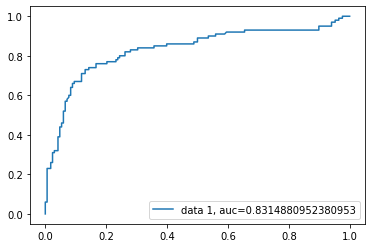

In [81]:
fpr, tpr, _ = metrics.roc_curve(y_test_nb,  probas_nb)
auc = metrics.roc_auc_score(y_test_nb, probas_nb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.83.

It means there is 83% chance that model will be able to distinguish between positive class and negative class.

AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

# 5.Support Vector Machine (SVM)

In [83]:
#Split into train and test
from sklearn.model_selection import train_test_split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.3, random_state=0)

In [84]:
X_train_svm.shape, X_test_svm.shape, y_train_svm.shape, y_test_svm.shape

((623, 7), (268, 7), (623,), (268,))

In [88]:
print ('labels count in y:', np.bincount(y))      # here 0 must will 549 and 1 must be 342 or vice-versa
print ('labels count in y_train:', np.bincount(y_train_svm))  #It counts occurrence of each element i.e. size of y data
print ('labels count in y_test:', np.bincount(y_test_svm))

labels count in y: [549 342]
labels count in y_train: [381 242]
labels count in y_test: [168 100]


## Training the Algorithm

In [89]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 1.0, random_state = 1)

In [90]:
svm.fit(X_train_svm, y_train_svm)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

## Making Predictions

In [91]:
# making predictions on the testing set
y_pred_svm = svm.predict(X_test_svm)

In [92]:
df = pd.DataFrame({'Actual': y_test_svm, 'Predicted': y_pred_svm})
df.head()

,Actual,Predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1


## Evaluating the Algorithm

In [93]:
# import the metrics class
from sklearn import metrics
cnf_matrix_svm = metrics.confusion_matrix(y_test_svm, y_pred_svm)
cnf_matrix_svm

array([[140,  28],
       [ 29,  71]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

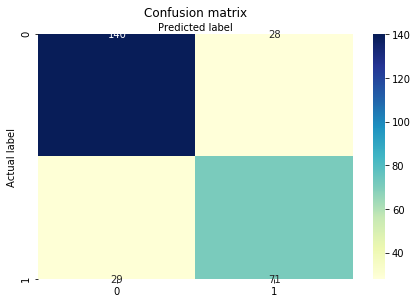

In [94]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [95]:
print(metrics.classification_report(y_test_svm, y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       168
           1       0.72      0.71      0.71       100

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



In [96]:
# Confusion Matrix Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test_svm, y_pred_svm))
print("Precision:",metrics.precision_score(y_test_svm, y_pred_svm))
print("Recall:",metrics.recall_score(y_test_svm, y_pred_svm))

Accuracy: 0.7873134328358209
Precision: 0.7171717171717171
Recall: 0.71


Accuracy score is 78%, which is considered as good metric. Accuracy score is not a very good thing to perform measure.

In our prediction case, when SVM model predicted that these many passengers are not going to survive, that means 71% from these many passengers will surely die.

Recall: There are passengers who are not going to survive in the test set and our SVM model can identify it 71% of the time.

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_svm,  probas_svm)
auc = metrics.roc_auc_score(y_test_svm, probas_svm)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.83.

It means there is 83% chance that model will be able to distinguish between positive class and negative class.

AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

## Out of the above five algorithms we can state that 'Decision Tree' is the best algorithm on the basis of four metrics used to compare those algorithms. 